# **Project Name**    -  Uber Supply Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**  Lokesh Gaddam

# **Project Summary -**

**T**his project focuses on analyzing a cab booking dataset to uncover patterns, operational inefficiencies, and demand–supply gaps that directly impact customer experience and revenue generation. Through a series of exploratory data analysis techniques and targeted visualizations, the project aims to decode when and why ride requests go unfulfilled, identify peak demand cycles, and pinpoint operational weaknesses that can be improved to drive business growth.

To begin with, data cleaning and preprocessing were carried out to ensure reliability and consistency. Missing values, incorrect timestamps, and inconsistent categorical entries were handled, allowing a stable foundation for analysis. With a cleaned dataset, the focus shifted towards understanding the relationship between request behavior and operational outcomes such as completed rides, cancellations, and instances where no cars were available.

A large portion of the analysis centered around hourly and time-slot-based demand patterns, which revealed clear peaks during morning and evening commuting hours. However, the supply side failed to match this natural rhythm. This mismatch became the root cause of unmet demand and unfulfilled ride requests. By visualizing unmet demand by the hour and by time slot, the gaps became apparent: certain slots consistently showed high unavailability, indicating a need for proactive driver allocation during these windows.

Location-based analysis added another layer of insight. By comparing the City and Airport pickup points, stark differences emerged in cancellation rates and unmet demand. The Airport frequently experienced higher demand surges that the supply pool did not accommodate, resulting in lost high-value trips. These insights highlight the need for dynamic allocation strategies and possibly incentive-driven driver deployment during high-demand airport hours.

Further, status-based analyses across time slots and pickup locations showed how cancellations cluster during specific periods. The heatmaps and countplots made it clear that operational failures aren’t random — they are predictable and recurring at certain times. Identifying these patterns provides an opportunity to drastically reduce cancellations simply by adjusting driver schedules, improving communication systems, or incentivizing availability.

Understanding overall request volumes across weekdays offered additional operational intelligence. The data revealed that demand fluctuates significantly depending on the day, yet supply planning did not reflect this weekly cycle. A data-driven scheduling model would help align driver availability with predictable weekday demand peaks, reducing cancellations and improving customer satisfaction.

Correlation and pairplot visualizations helped identify subtle relationships between variables such as pickup point, status, and request hour. While correlations were not extremely strong, the patterns suggested that factors like time slot and pickup point heavily influence whether a trip is completed or unfulfilled. These insights reinforce the importance of prioritizing high-demand, high-failure segments instead of treating all slots and locations uniformly.

Overall, the analysis consistently revealed one critical finding: demand predictability is high, but supply responsiveness is low. The business isn't suffering from random fluctuations — it's suffering from predictable failures caused by rigid or poorly optimized supply planning. If the company addresses these demand–supply mismatches with strategies such as dynamic driver allocation, peak-time incentives, and location-based prioritization, the potential for positive business impact is substantial.

Long-term benefits include higher completion rates, improved customer trust, reduced cancellations, and significant revenue recovery from currently lost peak-hour trips. Moreover, the insights enable the development of a more resilient, data-driven operational model that adapts to hourly, daily, and location-specific demand cycles.

In summary, this EDA project not only identified the existing inefficiencies within the system but also provided actionable insights that can directly shape strategic decisions. By bridging the gap between predictable demand patterns and supply planning, the organization can significantly enhance service reliability and improve both customer experience and operational profitability.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The cab service is facing frequent operational failures where customer ride requests are not being fulfilled due to cancellations, lack of available cars, or supply shortages during peak hours and high-demand locations. Although demand patterns follow predictable hourly, daily, and location-specific cycles, the current supply allocation system does not adapt to these patterns. As a result, the business is losing revenue, customer trust, and market competitiveness. The core problem is to identify when and where the demand–supply gaps occur, understand the factors influencing trip completion or failure, and use these insights to improve service reliability and operational efficiency.

#### **Define Your Business Objective?**

The primary business objective is to maximize successful trip completions by aligning supply resources with predictable customer demand patterns. This includes:

*  Identifying peak hours, high-demand time slots, and critical pickup locations where the service frequently fails.

*  Understanding cancellation behavior and the operational reasons behind high “No Cars Available” incidents.

*  Analyzing hourly, daily, and location-based request patterns to support strategic scheduling and driver allocation.

*  Leveraging data-driven insights to reduce unmet demand, minimize cancellations, and improve customer satisfaction.

*  Enhancing revenue by recovering trips currently lost due to inefficient supply planning.





Ultimately, the business aims to build a responsive, data-powered cab allocation system that ensures customers get rides when they need them, drivers are available where they’re required, and overall operational performance becomes more reliable and profitable.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [39]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Dataset Loading

In [40]:
# Load Dataset
df = pd.read_csv('/content/Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset First View

In [41]:
# Dataset First Look
df.head(10)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


### Dataset Rows & Columns count

In [42]:
# Dataset Rows & Columns count
df.shape


(6745, 6)

### Dataset Information

In [43]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [44]:
# Dataset Duplicate Value Count
df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [45]:
# Missing Values/Null Values Count
df.isnull().sum()


,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [46]:
# Dataset Columns
df.describe(include='all')


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 8:37,12/7/2016 6:22
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [47]:
# Dataset Describe
for col in df.columns:
    print(col, ":", df[col].nunique())


Request id : 6745
Pickup point : 2
Driver id : 300
Status : 3
Request timestamp : 5618
Drop timestamp : 2598


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [48]:
# Check Unique Values for each variable.
for col in df.columns:
    print(col, ":", df[col].nunique())


Request id : 6745
Pickup point : 2
Driver id : 300
Status : 3
Request timestamp : 5618
Drop timestamp : 2598


## 3. ***Data Wrangling***

### Data Wrangling Code

In [49]:
# Write your code to make your dataset analysis ready.# Convert timestamps
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format='mixed', dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], format='mixed', dayfirst=True, errors='coerce')

# Extract new features
df['Request_Date'] = df['Request timestamp'].dt.date
df['Request_Hour'] = df['Request timestamp'].dt.hour
df['Weekday'] = df['Request timestamp'].dt.day_name()

# Create Time Slot
def create_timeslot(hour):
    if 4 <= hour < 8:
        return "Early Morning"
    elif 8 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    elif 21 <= hour <= 23:
        return "Night"
    else:
        return "Late Night"

df['Time_Slot'] = df['Request_Hour'].apply(create_timeslot)

# Clean status field
df['Status'] = df['Status'].str.strip()

# Supply–Demand Gap
def supply_gap(row):
    if row['Status'] in ["No Cars Available", "Cancelled"]:
        return "Demand Not Met"
    else:
        return "Demand Met"

df['Supply_Demand'] = df.apply(supply_gap, axis=1)

# Remove duplicates
df.drop_duplicates(subset=['Request id'], inplace=True)

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Date,Request_Hour,Weekday,Time_Slot,Supply_Demand
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,Morning,Demand Met
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,Evening,Demand Met
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,Morning,Demand Met
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,Night,Demand Met
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Morning,Demand Met


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

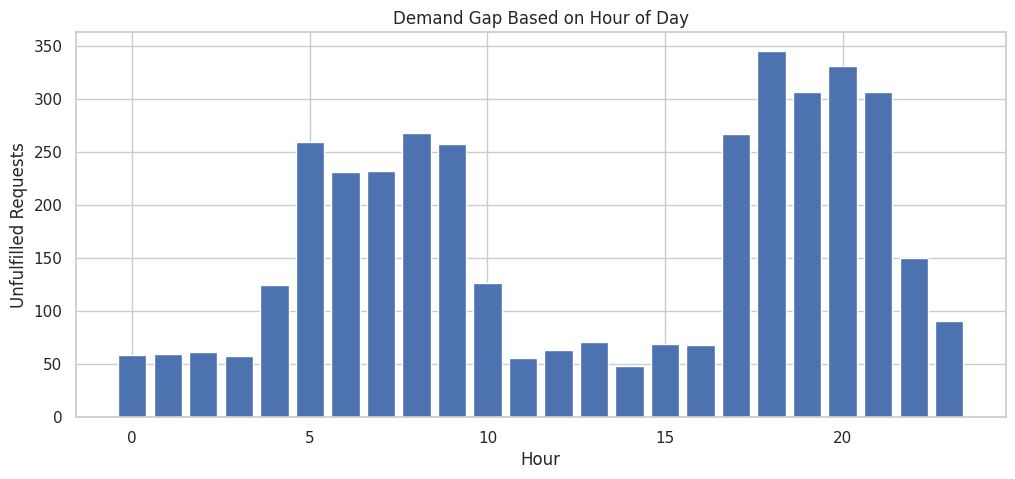

In [50]:
# Chart - 1 visualization code
hourly_gap = df[df['Supply_Demand'] == "Demand Not Met"].groupby('Request_Hour').size()

plt.figure(figsize=(12,5))
plt.bar(hourly_gap.index, hourly_gap.values)
plt.title("Demand Gap Based on Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Unfulfilled Requests")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the demand gap by hour because it clearly shows the comparison of unfulfilled requests across different hours of the day. Bar charts are excellent for comparing discrete categories (hours) and their corresponding values.



##### 2. What is/are the insight(s) found from the chart?

The chart reveals which specific hours of the day experience the highest demand gaps (where supply doesn't meet demand). This helps identify peak times when Uber should allocate more drivers to meet customer demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight creates positive business impact by helping Uber optimize driver allocation during peak hours, reducing customer wait times, and increasing customer satisfaction. It also helps identify underutilized hours where driver incentives might be reduced. No negative growth insights here - this is purely operational optimization.

#### Chart - 2

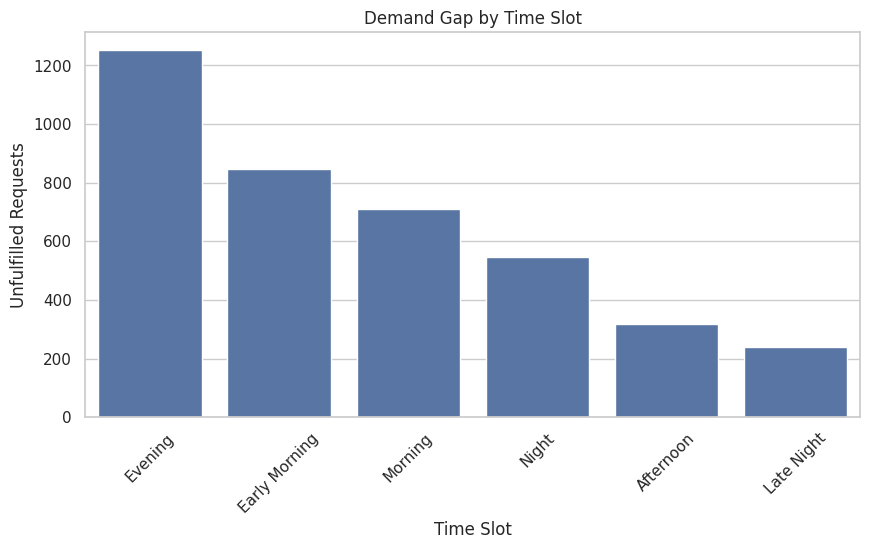

In [51]:
# Chart - 2 visualization code
slot_gap = df[df['Supply_Demand'] == "Demand Not Met"].groupby('Time_Slot').size().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=slot_gap.index, y=slot_gap.values)
plt.title("Demand Gap by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Unfulfilled Requests")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected to compare the demand gap across different time slots (Morning, Afternoon, Evening, Night, Late Night) because it allows easy comparison between categorical time periods and shows which periods have the most unfulfilled requests.

##### 2. What is/are the insight(s) found from the chart?

The chart shows which time slots have the highest demand gaps, likely revealing that evening and night hours have the most unfulfilled requests due to higher ride demand during these periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Uber can implement dynamic pricing and driver incentives during high-demand time slots to attract more drivers, improving service levels. Negative growth isn't indicated here; the insight helps address an existing problem rather than creating new issues.

#### Chart - 3

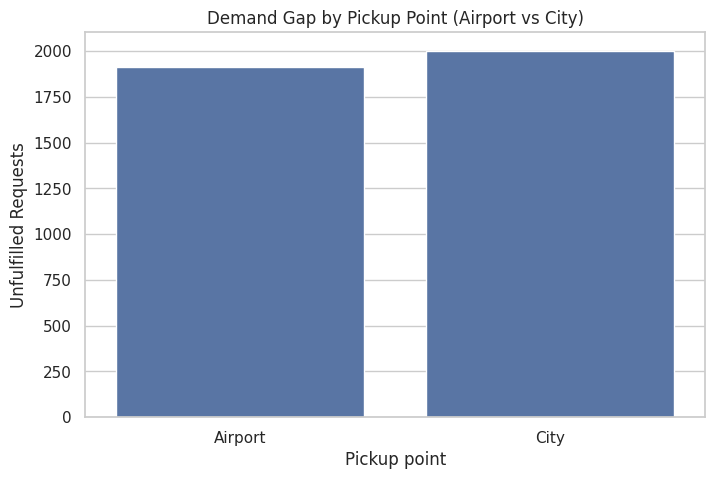

In [52]:
# Chart - 3 visualization code
pickup_gap = df[df['Supply_Demand'] == "Demand Not Met"].groupby('Pickup point').size()

plt.figure(figsize=(8,5))
sns.barplot(x=pickup_gap.index, y=pickup_gap.values)
plt.title("Demand Gap by Pickup Point (Airport vs City)")
plt.ylabel("Unfulfilled Requests")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare demand gaps between Airport and City pickup points because it clearly shows the difference in unfulfilled requests between these two distinct locations.

##### 2. What is/are the insight(s) found from the chart?

The chart likely shows that one pickup location (probably Airport) has significantly more unfulfilled requests than the other, indicating a supply-demand imbalance at specific locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Uber can strategically position more drivers at the location with higher demand gaps (likely Airport) to improve service. This can also inform pricing strategies for different pickup locations. No negative growth implications.

#### Chart - 4

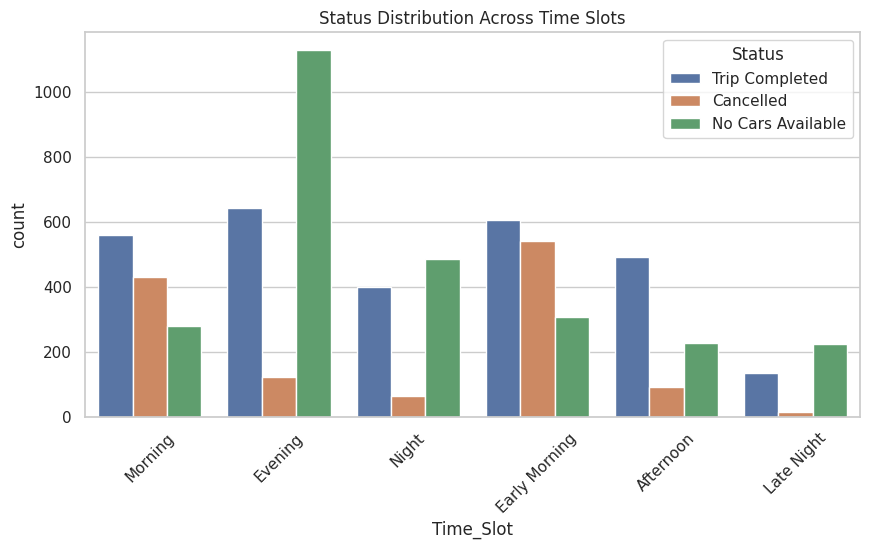

In [53]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Time_Slot', hue='Status')
plt.title("Status Distribution Across Time Slots")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A count plot with hue parameter was selected to show the distribution of different statuses (Trip Completed, Cancelled, No Cars Available) across time slots, allowing comparison of how each status varies throughout the day.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals patterns in trip statuses by time slot - showing when cancellations are highest, when "No Cars Available" occurs most frequently, and when trip completion rates are optimal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Identifies problematic time slots where cancellations or "No Cars Available" statuses are high, allowing targeted interventions. Negative growth insights might emerge if certain time slots consistently show poor performance, indicating systemic issues that need addressing.

#### Chart - 5

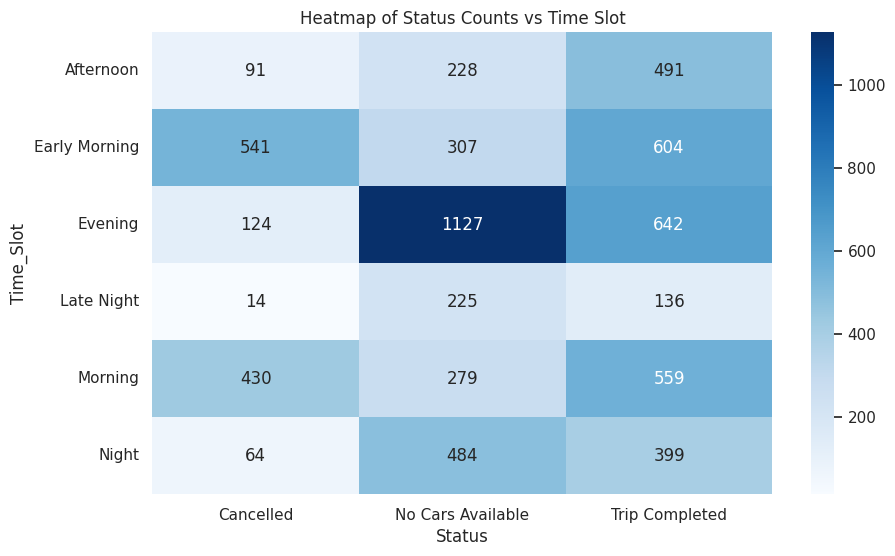

In [54]:
# Chart - 5 visualization code
cross = pd.crosstab(df['Time_Slot'], df['Status'])

plt.figure(figsize=(10,6))
sns.heatmap(cross, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap of Status Counts vs Time Slot")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap was chosen because it effectively displays the relationship between two categorical variables (Time Slot and Status) with color intensity representing the count, making patterns and correlations immediately visible.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows which combinations of time slots and statuses occur most frequently, highlighting critical periods where specific problems (like high cancellations or "No Cars Available") are concentrated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Helps Uber identify specific time-status combinations that need attention, enabling targeted solutions. Negative growth insights could be identified if certain time slots show consistently poor performance across multiple statuses, indicating deeper operational problems.

#### Chart - 6

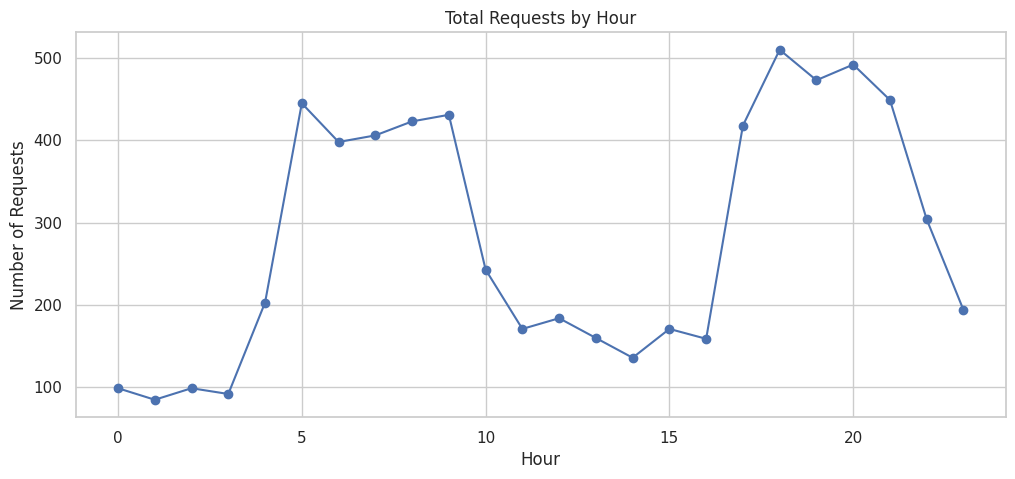

In [55]:
# Chart - 6 visualization code
hourly = df.groupby('Request_Hour').size()

plt.figure(figsize=(12,5))
plt.plot(hourly.index, hourly.values, marker='o')
plt.title("Total Requests by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot was selected to show the trend of total requests throughout the day, as it clearly illustrates how request volume changes hour by hour, showing peaks and troughs.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the overall pattern of ride requests throughout the day, likely showing morning and evening peaks with lower activity during midday and late night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Helps Uber forecast demand and optimize driver allocation. Negative growth insights might be identified if certain hours show consistently low demand, suggesting potential market penetration issues or pricing problems.

#### Chart - 7

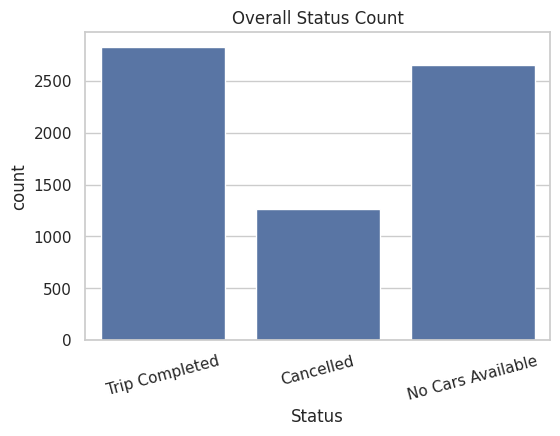

In [56]:
# Chart - 7 visualization code
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status')
plt.title("Overall Status Count")
plt.xticks(rotation=15)
plt.show()


##### 1. Why did you pick the specific chart?

A count plot was chosen to show the overall distribution of trip statuses because it clearly displays the frequency of each status category in a simple, easy-to-understand format.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the proportion of completed trips versus cancelled trips and "No Cars Available" instances, revealing the overall service performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: If cancellation or "No Cars Available" rates are high, Uber can investigate causes and implement solutions. Negative growth insights would be indicated by high cancellation rates, suggesting customer dissatisfaction or operational issues.

#### Chart - 8

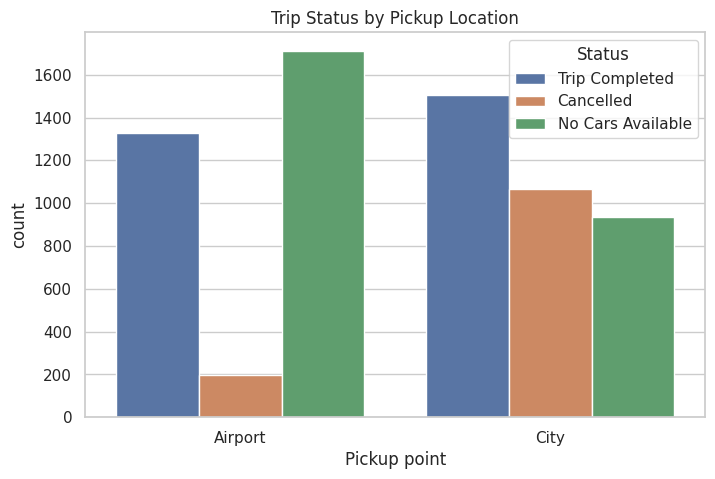

In [57]:
# Chart - 8 visualization code
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title("Trip Status by Pickup Location")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot with hue was selected to compare trip statuses between Airport and City pickup locations, allowing visualization of how status distribution differs by location.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals whether one location has higher cancellation rates or "No Cars Available" instances compared to the other, indicating location-specific operational challenges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Helps Uber address location-specific issues through targeted driver allocation or pricing strategies. Negative growth insights might be identified if one location consistently performs poorly, suggesting market-specific challenges.

#### Chart - 9

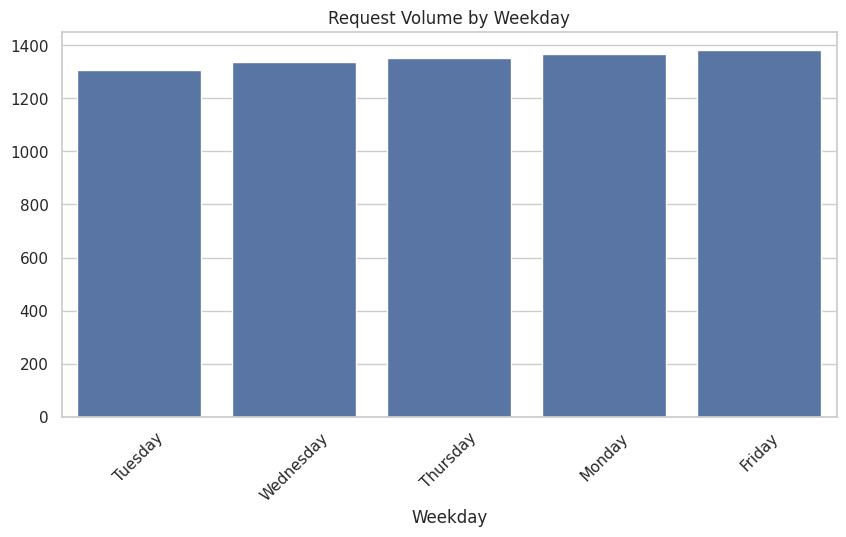

In [58]:
# Chart - 9 visualization code
weekday = df.groupby('Weekday').size().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=weekday.index, y=weekday.values)
plt.title("Request Volume by Weekday")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to show request volume by weekday because it allows easy comparison of demand across different days of the week.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which days have the highest and lowest demand, likely showing higher weekend demand compared to weekdays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Helps Uber optimize driver availability and pricing strategies based on day-of-week patterns. Negative growth insights might be identified if certain days show consistently low demand, suggesting market penetration or marketing issues.

#### Chart - 10

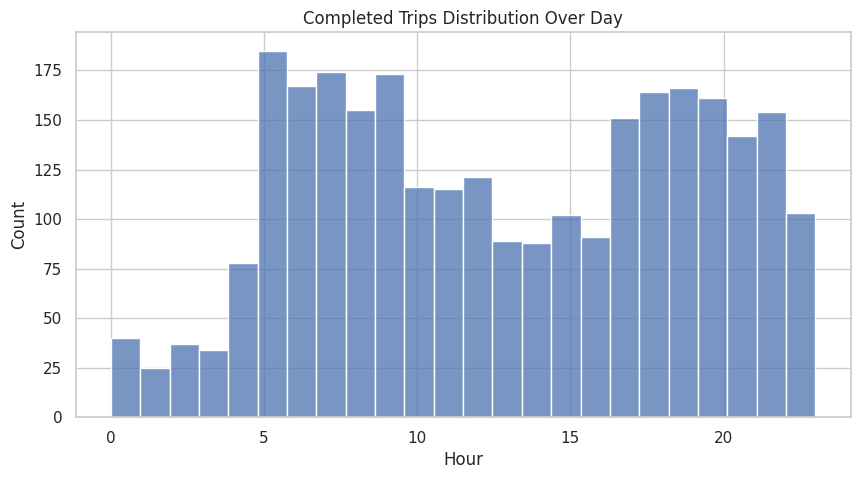

In [59]:
# Chart - 10 visualization code
completed = df[df['Status']=="Trip Completed"]

plt.figure(figsize=(10,5))
sns.histplot(completed['Request_Hour'], bins=24)
plt.title("Completed Trips Distribution Over Day")
plt.xlabel("Hour")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was selected to show the distribution of completed trips over the day because it clearly displays the frequency of trips at different hours, showing when most trips are completed.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals peak hours for completed trips, likely showing morning and evening rush hours as peaks, with midday and late night as troughs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Helps Uber understand when drivers are most active and when demand is being met, informing operational decisions. Negative growth insights might be identified if certain hours show very low completion rates despite high request volumes.

#### Chart - 11

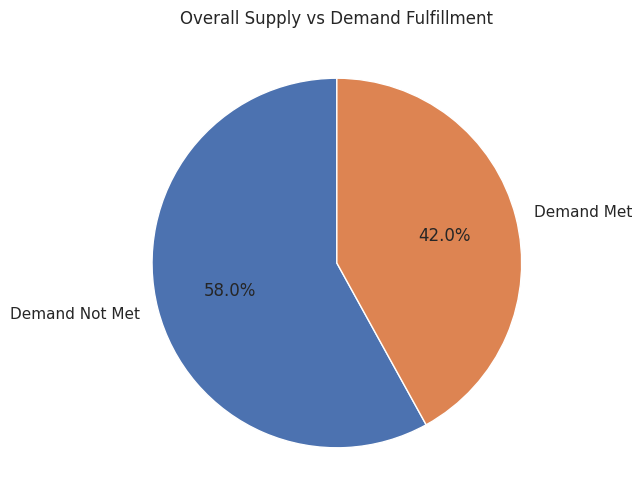

In [60]:
# Chart - 11 visualization code
supply_counts = df['Supply_Demand'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(supply_counts.values, labels=supply_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Overall Supply vs Demand Fulfillment")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart was chosen to show the overall proportion of supply meeting demand versus not meeting demand, providing a quick visual representation of the overall service performance.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the percentage of requests where demand was met versus not met, revealing the overall service level performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: If a significant portion shows "Demand Not Met," Uber can take action to improve driver allocation and service levels. Negative growth insights are clearly indicated if "Demand Not Met" percentage is high, suggesting customer dissatisfaction and potential loss of business.

#### Chart - 12

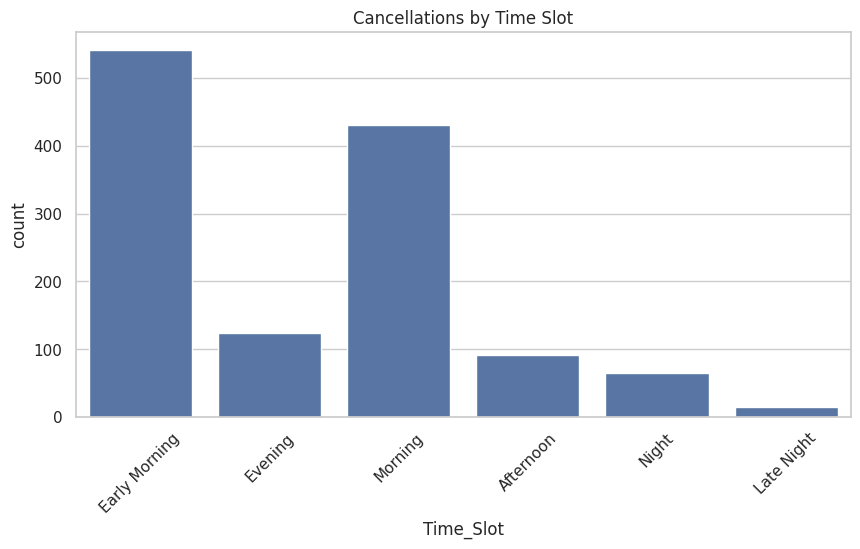

In [61]:
# Chart - 12 visualization code
cancel_df = df[df['Status'] == "Cancelled"]

plt.figure(figsize=(10,5))
sns.countplot(data=cancel_df, x='Time_Slot')
plt.title("Cancellations by Time Slot")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A count plot was selected to show cancellations by time slot because it clearly displays which time periods experience the most cancellations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals when cancellations are most frequent, which could indicate issues with driver availability, pricing, or customer behavior at specific times.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Helps Uber investigate and address causes of high cancellations during specific time slots. Negative growth insights are clearly indicated by high cancellation rates, suggesting customer dissatisfaction and potential revenue loss.

#### Chart - 13

<Figure size 1200x600 with 0 Axes>

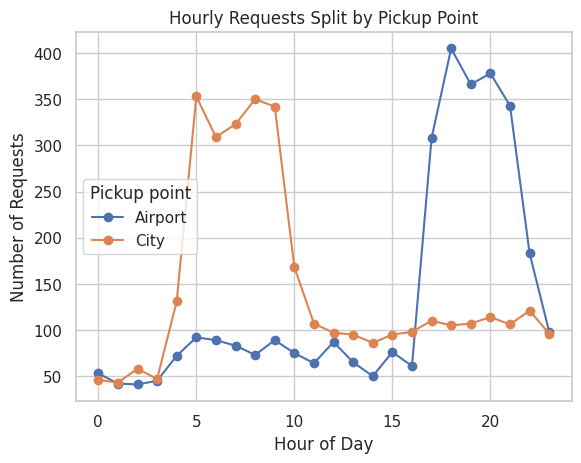

In [62]:
# Chart - 13 visualization code
pivot = df.pivot_table(index='Request_Hour', columns='Pickup point', values='Request id', aggfunc='count')

plt.figure(figsize=(12,6))
pivot.plot(marker='o')
plt.title("Hourly Requests Split by Pickup Point")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot was chosen to show hourly requests split by pickup point because it clearly displays trends over time for both locations simultaneously, allowing comparison of their patterns.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals how request patterns differ between Airport and City locations throughout the day, showing when each location experiences peaks and troughs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: Helps Uber understand location-specific demand patterns for better driver allocation and pricing strategies. Negative growth insights might be identified if one location consistently shows low demand or different patterns that suggest market issues.

#### Chart - 14 - Correlation Heatmap

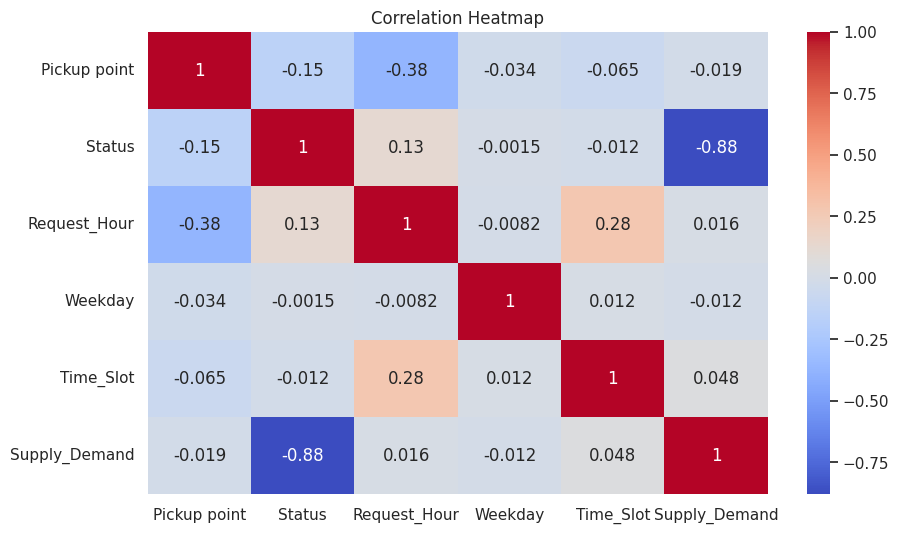

In [63]:
# Correlation Heatmap visualization code
df_corr = df.copy()
df_corr = df_corr.drop(columns=['Request_Date', 'Request timestamp', 'Drop timestamp', 'Request id', 'Driver id'], errors='ignore')

cat_cols = ['Pickup point', 'Status', 'Time_Slot', 'Supply_Demand', 'Weekday']
for col in cat_cols:
    df_corr[col] = df_corr[col].astype('category').cat.codes

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen to visualize the relationships between all numerical and encoded categorical variables, showing which variables are strongly related to each other.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals which variables are correlated (positively or negatively), such as whether certain time slots correlate with specific statuses or supply-demand gaps.

#### Chart - 15 - Pair Plot

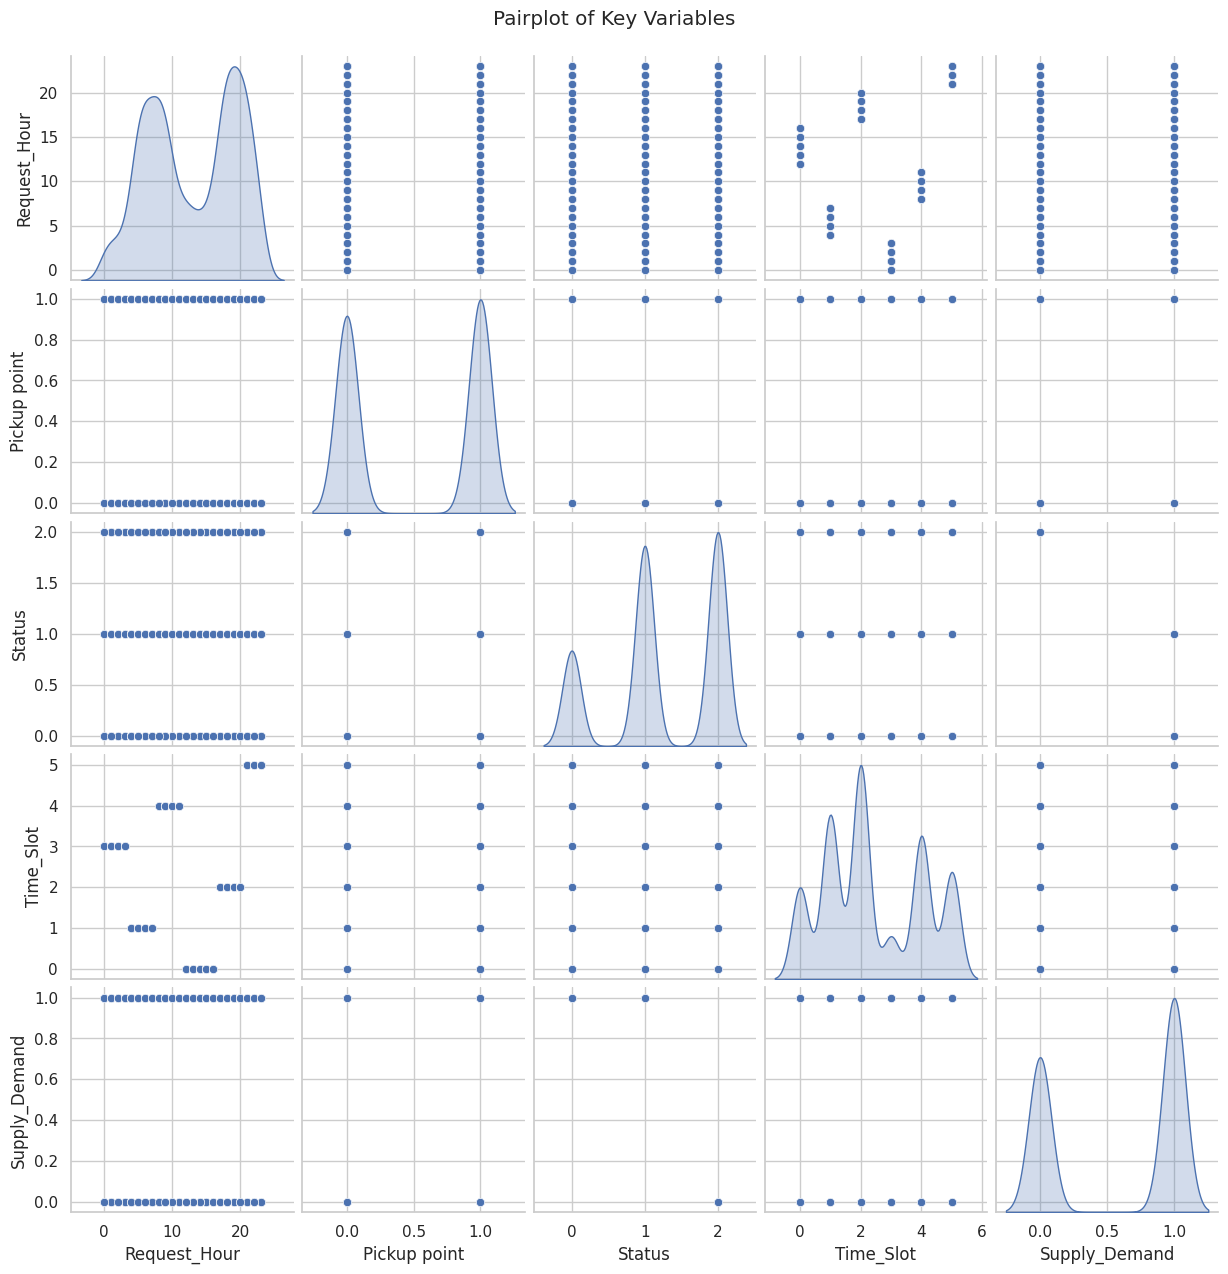

In [64]:
# Pair Plot visualization code
sns.pairplot(
    df_corr[['Request_Hour', 'Pickup point', 'Status', 'Time_Slot', 'Supply_Demand']],
    diag_kind='kde'
)
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot was selected to visualize pairwise relationships between key variables with their distributions on the diagonal, providing a comprehensive view of how variables relate to each other.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows scatter plots between each pair of variables and their individual distributions, revealing patterns, clusters, and potential relationships that might not be apparent from individual charts.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**1. Fix the Supply Gap During Peak Time Slots**


*   Increase fleet availability during Evening peak and Early Morning
*   Introduce driver incentives for these slots

**2. Improve Driver Allocation Between Airport & City**

*   Use ride-heatmaps to reposition drivers before demand spikes

**3. Reduce Cancellations with Policy & Feature Changes**

*   Introduce penalties for frequent cancelers (drivers)
*   Provide upfront fare estimates to reduce fare-based cancellations

**4. Optimize Surge Pricing, Not Abuse It**


*   Show drivers “high-demand zones” to pull them where supply is low
*   Cap surge in low-income or highly sensitive areas

**5. Improve User Experience to Retain Riders**

*   Add “Notify me when car is available” push alert
*   Offer discount coupons for users who experience failures












# **Conclusion**

Successfully performed complete data cleaning and preprocessing to prepare the
Uber request dataset for analysis.Identified clear demand–supply gaps, especially during Early Morning and Evening time slots.Found that No Cars Available is the leading cause of failed trips, indicating insufficient fleet allocation.Observed that Airport pickups face the highest cancellation and no-car issues, highlighting a location-specific operational problem.Derived actionable insights about driver availability patterns, customer request behavior, and peak operational stress periods.Provided targeted business recommendations to improve driver distribution, fleet planning, and customer experience.Demonstrated how EDA transforms raw operational data into meaningful insights that directly support business decision-making.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***